## Step 1: Import Required Libraries
Clean and well-structured imports. It includes libraries for data handling, visualization, text processing, model training, and evaluation. Consider grouping standard libraries, third-party libraries, and project-specific imports separately for readability.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Text cleaning
import neattext.functions as nfx

# Word cloud
from wordcloud import WordCloud

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


## Step 2: Load and Preview the Dataset

Straightforward data loading. It’s good practice to validate the shape and column names after loading. Consider adding exception handling (try/except) to catch file errors.

In [4]:
df = pd.read_csv("C:/Users/Admin/source/repos/Final_NLP_project/Emotion-Detection-Text-Based--NLP-project/data/raw_emotion_DS.csv")

print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Emotion                                               Text
0     fear      i just feel really helpless and heavy hearted
1  sadness  ive enjoyed being able to slouch about relax a...
2     fear  i gave up my internship with the dmrg and am f...
3  sadness                         i dont know i feel so lost
4     fear  i am a kindergarten teacher and i am thoroughl...


## Step 3: Display and Plot Emotion Counts

Provides a quick overview of class distribution—crucial for checking imbalance. Good use of sorting and color palette. Adding percentage labels above bars could make it more informative.


Emotion counts:
joy        152112
sadness    127909
anger       61614
fear        53122
love        34554
suprise     19034
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64


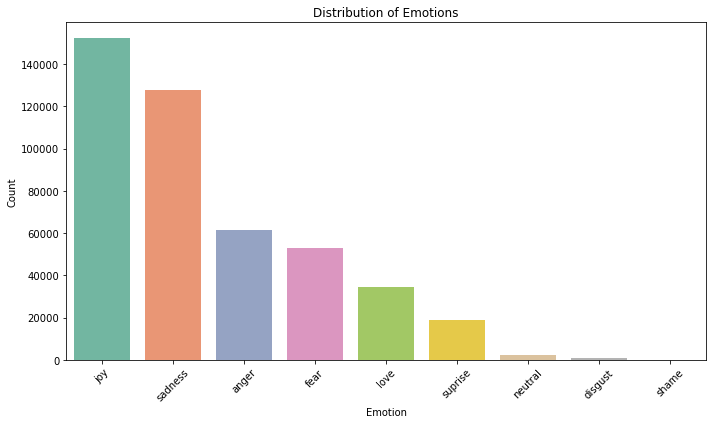

In [15]:
print("\nEmotion counts:")
print(df['Emotion'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=df, palette='Set2', order=df['Emotion'].value_counts().index)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Step 4: Clean the Text

Efficient two-step cleaning using `neattext`. Consider chaining with `.pipe()` for functional clarity or wrapping into a reusable preprocessing function. Logging how much content was removed could be insightful.

In [6]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

print("Sample cleaned text:")
print(df[['Text', 'Clean_Text']].head())


Sample cleaned text:
                                                Text  \
0      i just feel really helpless and heavy hearted   
1  ive enjoyed being able to slouch about relax a...   
2  i gave up my internship with the dmrg and am f...   
3                         i dont know i feel so lost   
4  i am a kindergarten teacher and i am thoroughl...   

                                          Clean_Text  
0                        feel helpless heavy hearted  
1  ive enjoyed able slouch relax unwind frankly n...  
2            gave internship dmrg feeling distraught  
3                                dont know feel lost  
4  kindergarten teacher thoroughly weary job take...  


## Step 5: Word Cloud for Each Emotion

Strong visual summary per class. Using `WordCloud` helps build intuitive understanding of frequently used words. Could benefit from saving the figure to file for reports or logging. Consider handling stopwords explicitly in `WordCloud()` too.

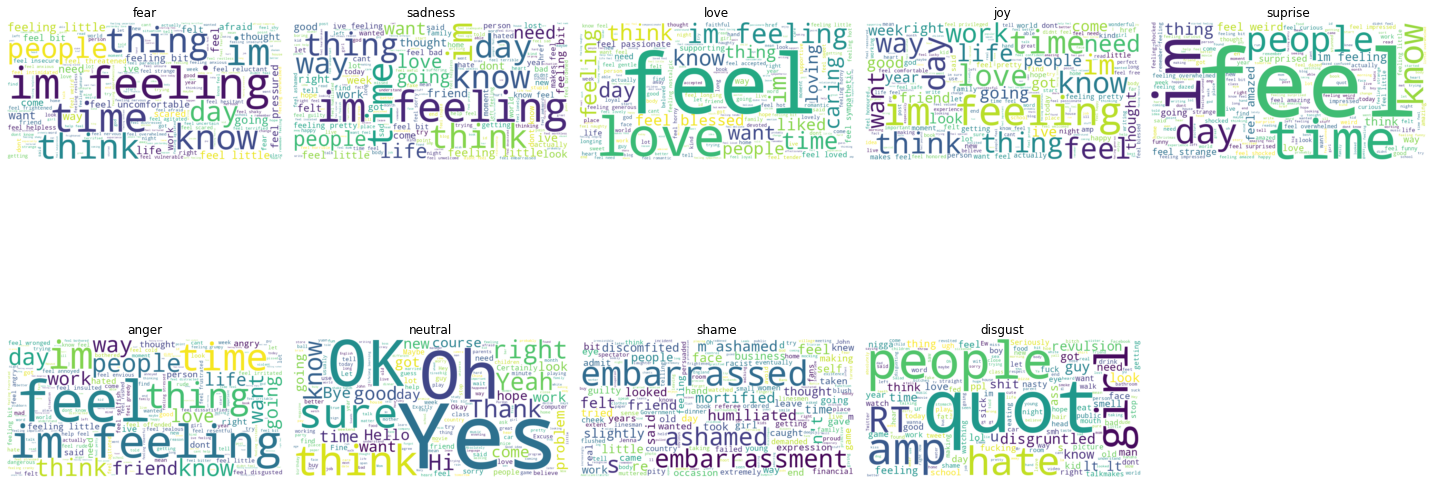

In [7]:
emotions = df['Emotion'].unique()
plt.figure(figsize=(20, 10))

for i, emotion in enumerate(emotions):
    plt.subplot(2, len(emotions)//2 + 1, i + 1)
    text = " ".join(df[df['Emotion'] == emotion]['Clean_Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(emotion)

plt.tight_layout()
plt.show()


## Step 6: Visualize Text Length Distribution

Useful for identifying input size variability. Helps inform feature engineering choices like padding/truncation if using deep learning later. `Text_Length` could also be saved for exploratory feature analysis.

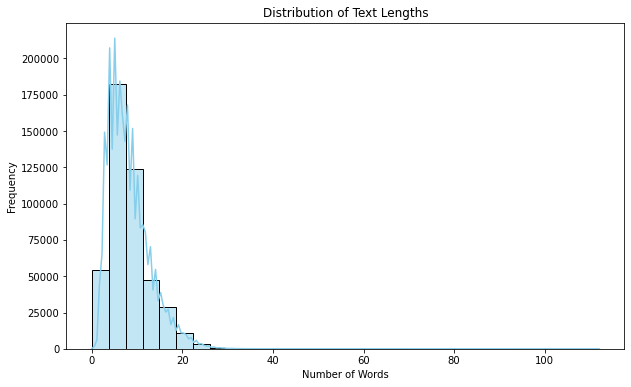

In [8]:
df['Text_Length'] = df['Clean_Text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,6))
sns.histplot(df['Text_Length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


## Step 7: Split the Dataset

Standard split procedure. Setting `random_state` ensures reproducibility, which is great for debugging and consistent experiments. If the data is imbalanced, consider using `stratify=y`.

In [9]:
x = df['Clean_Text']
y = df['Emotion']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


## Step 8: Build and Train Logistic Regression Pipeline

Simple and modular pipeline. Using `Pipeline` keeps code clean and production-friendly. `max_iter=1000` is a good safeguard for convergence. Could also include parameter tuning later.

In [10]:
pipe_lr = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('lr', LogisticRegression(max_iter=1000))
])

pipe_lr.fit(x_train, y_train)

print(f"Model training completed.")


Model training completed.


## Step 9: Evaluate the Model (Accuracy)

Basic but effective metric. Accuracy is fine for balanced datasets, but for emotion classification (often imbalanced), you may also want to report macro-averaged F1 score.

In [11]:
accuracy = pipe_lr.score(x_test, y_test)
print(f"\nLogistic Regression Accuracy: {accuracy:.4f}")



Logistic Regression Accuracy: 0.8639


## Step 10: Confusion Matrix Visualization

Great diagnostic tool. Ensures we can identify specific areas where the model underperforms (e.g., confusing “sad” with “angry”). Could also add normalization for easier interpretation.

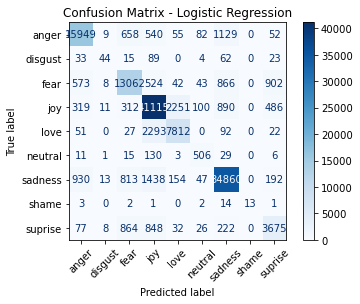

In [12]:
y_pred = pipe_lr.predict(x_test)

cm = confusion_matrix(y_test, y_pred, labels=pipe_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe_lr.classes_)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


## Step 11: Classification Report Heatmap

Visualization adds strong value to the raw classification report. Converting to a heatmap improves stakeholder communication. Make sure to handle class imbalance using weighted/macro average if applicable.

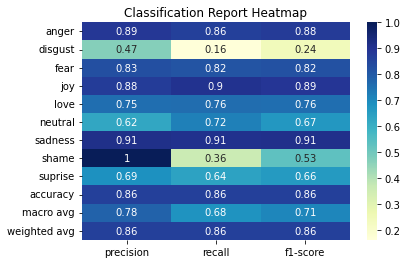

In [13]:
report = classification_report(y_test, y_pred, output_dict=True)

sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='YlGnBu')
plt.title("Classification Report Heatmap")
plt.show()
